# Finding threshold and initial step counting Week 2

In [1103]:
# Imports
import os
import pandas as pd
import numpy as np
from numpy import *

import importlib
import count_steps
importlib.reload(count_steps)


import sklearn
import matplotlib.pyplot as plt
import seaborn
import sensormotion as sm
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from scipy import signal

In [1104]:
# Reads all csv files in the data csvs folder and saves the dataframes and details in a tuple list
dfs = []

for filename in os.listdir('../data_csvs/'):
    if filename.endswith(".csv"):
        name = '../data_csvs/' + filename
        with open(name) as f:
            head = [next(f).rstrip().split('# ')[1] for x in range(10)]
            #for l in head:
            #    print(l)
            df = pd.read_csv(name, header=11)
            item = (head, df)
            dfs.append(item)

In [1105]:
# Displaying info of all dataframes
for d in dfs:
    des = d[0]
    df = d[1]
    #print(des)
    #df.plot(y=['accel_x', 'accel_y', 'accel_z'], figsize=(10,5))
    #df.plot(y=['gyro_x', 'gyro_y', 'gyro_z'], figsize=(10,5))
    #plt.show()
    #print('\n')

In [1106]:
bdf = pd.read_csv('../data_csvs/test_running_100.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/PDIoT_B_20190922T153213.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/test1.csv',  header=11)
#bdf = pd.read_csv('../data_csvs/test_walking_100.csv',  header=11)
#bdf.plot(y=['accel_x'], figsize=(15,5))
#bdf.plot(y=['gyro_x'], figsize=(15,5))
#plt.show()

xacc_df = pd.DataFrame(bdf['accel_x'], columns=['accel_x'])
yacc_df = pd.DataFrame(bdf['accel_y'], columns=['accel_y'])
zacc_df = pd.DataFrame(bdf['accel_z'], columns=['accel_z'])

xgy_df = pd.DataFrame(bdf['gyro_x'], columns=['gyro_x'])


In [1107]:
#xacc_df['threshold'] = xacc_df[]
th = (float(max(xacc_df.values)) + float(min(xacc_df.values)))/2
th

-0.22949219999999992

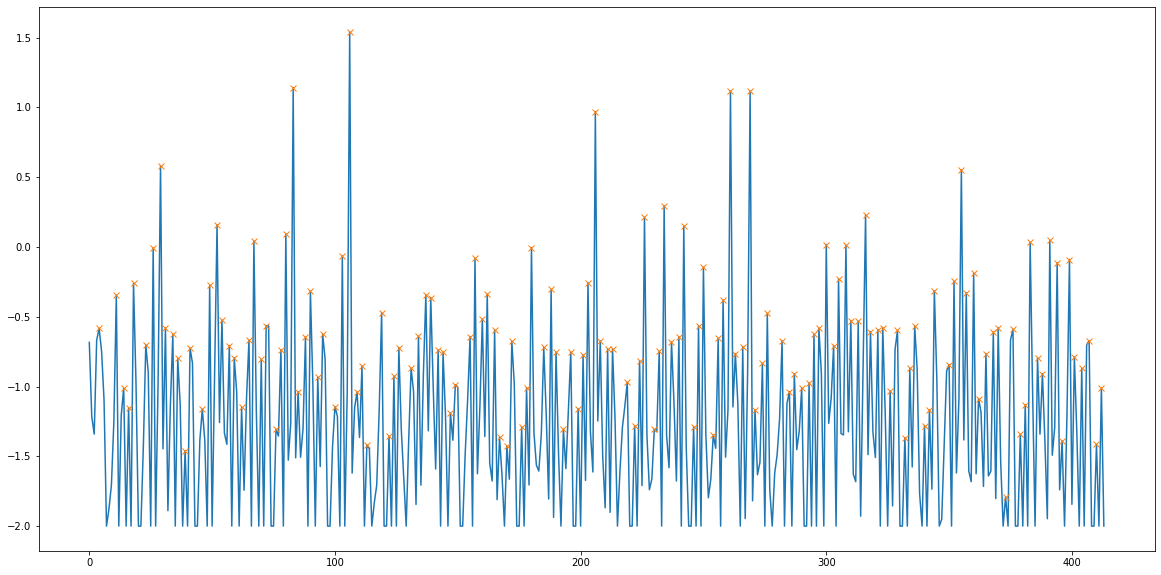

In [1108]:
peaks, _ = find_peaks(xacc_df['accel_x'])
fig = plt.figure(figsize=(20,10))
plt.plot(xacc_df['accel_x'])
plt.plot(peaks, xacc_df['accel_x'][peaks], "x")
plt.plot(np.mean(xacc_df['accel_x']), "--", color="k")
plt.show()

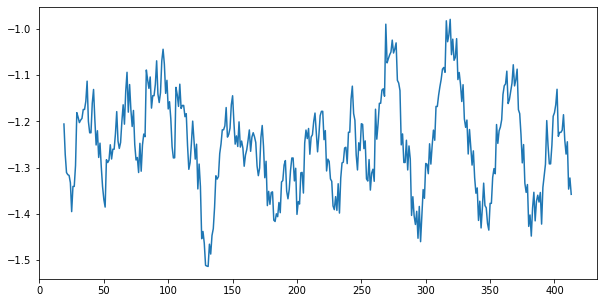

In [1109]:
temp = xacc_df['accel_x'].rolling(window=20).mean()
fig = plt.figure(figsize=(10,5))
plt.plot(temp)

Steps for mag_ax: <function get_filtered_steps at 0x126ca5268>
80


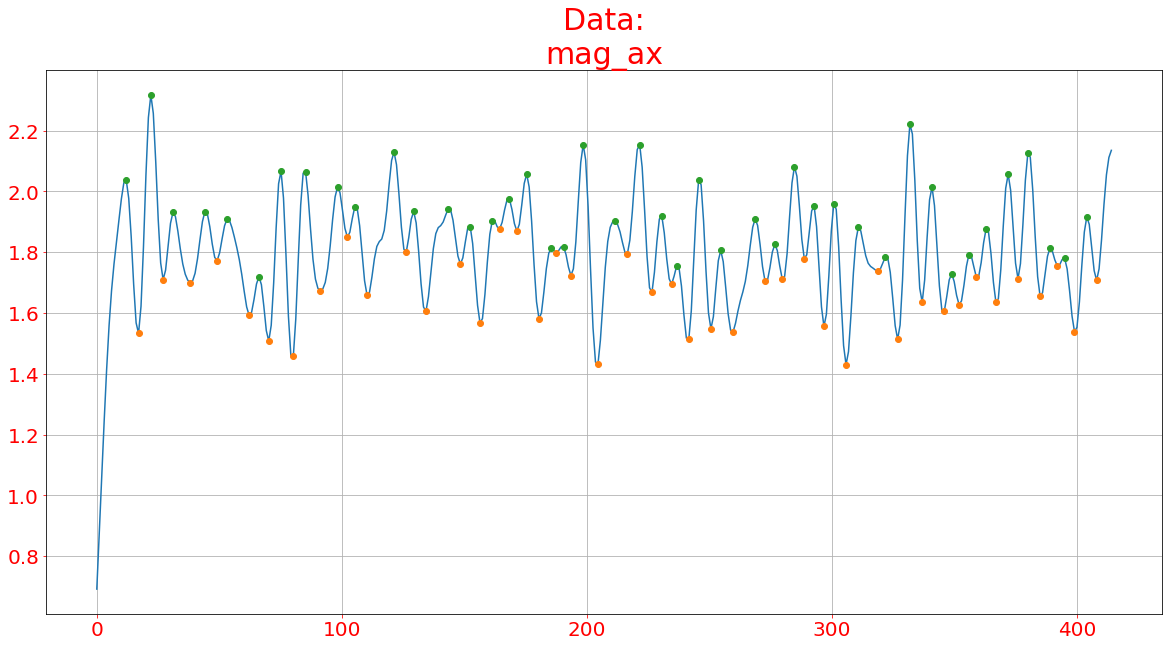

<function count_steps.get_filtered_steps(my_data)>

In [1110]:
# apply butter filter
#import count_steps
# dfa = xacc_df
pd_merge = pd.concat([xacc_df,yacc_df,zacc_df],axis=1)
pd_merge = pd_merge.values.tolist()

d = {'mag_ax': []}
mag_df = pd.DataFrame(data=d)
i =0
for x,y,z in pd_merge:
    i += 1
    mag_df.loc[i]=(sqrt(x*x + z*z + y*y))
#     print(x,y,z)
count_steps.run(mag_df,plot=True)
#mag_df.values
# xacc_df
# count_steps.run(xacc_df,plot=True)
# average_xyz=(count_steps.run(xacc_df)+count_steps.run(yacc_df,)+count_steps.run(zacc_df))/3
# print(average_xyz)
